In [3]:
# import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
# import seaborn as sns
# import requests
# import tensorflow as tf
# import time
# import json
# from datetime import datetime
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflowjs as tfjs
# from tool import plot_history, readFile, buildModel, PrintDot
# # from bokeh.plotting import figure, show

# import pandas_bokeh
# pandas_bokeh.output_notebook()
# import fbprophet
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")


In [204]:
dailyData = readFile('dailies')
dataset = pd.json_normalize(dailyData)

# dataset['flow'] = dataset.max * 40

# dataset.describe()
# dataset.to_numpy()
# dates = pd.date_range('20130101', periods=6)
# df = dataset.groupby('tickets.price').sum()
# dataset.pivot_table(df, values='value', index=['tickets.price'], columns=['tickets.price'])
# rng = pd.date_range('1/1/2012', periods=1000, freq='S')
# ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
# dataset.resample('5M', label='right').sum()
# df.plot(x='dateView', y=['max', 'value'], kind = 'bar')
# df.plot()



In [205]:
dataset['dateInde'] = pd.to_datetime(dataset['date'])
dataset['month'] = dataset['dateInde'].dt.month
dataset['year'] = dataset['dateInde'].dt.year
# datetime.date(dataset['date']).month
dataset = dataset.set_index('dateInde', drop=True)
dataset

,date,park,attractions,endTime,mark,startTime,state,max,rows,total,value,_id.$oid,weathers.pptHours,weathers.tempHours,weathers.windHours,month,year
dateInde,,,,,,,,,,,,,,,,,
2016-06-16,2016-06-16,shdr,[{'name': 'attRoaringRapids;entityType=Attract...,22:00:00,64,09:00:00,Operating,880,"[[1466039100, 0], [1466039400, 0], [1466039700...",51995.0,333,64563b193fa3e922e5eb1296,"[[9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [...","[[9, 23.2], [10, 24], [11, 24.1], [12, 24.6], ...","[[9, 0.9], [10, 0.7], [11, 0.4], [12, 0.7], [1...",6,2016
2016-06-17,2016-06-17,shdr,[{'name': 'attRoaringRapids;entityType=Attract...,22:00:00,93,09:00:00,Operating,1165,"[[1466125500, 430], [1466125800, 505], [146612...",99980.0,641,64563b693fa3e922e5eb1353,"[[9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [...","[[9, 26.3], [10, 28.1], [11, 29.4], [12, 29.5]...","[[9, 1.5], [10, 1.6], [11, 2.1], [12, 2.5], [1...",6,2016
2016-06-18,2016-06-18,shdr,[{'name': 'attSoaringOverHorizon;entityType=At...,22:00:00,89,09:00:00,Operating,1040,"[[1466211900, 600], [1466212200, 320], [146621...",86765.0,556,64563b6a3fa3e922e5eb1357,"[[9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [...","[[9, 27.2], [10, 28.4], [11, 29.6], [12, 30.7]...","[[9, 1.6], [10, 1.7], [11, 2.2], [12, 1.7], [1...",6,2016
2016-06-19,2016-06-19,shdr,[{'name': 'attTronLightcyclePowerRun;entityTyp...,00:00:00,80,09:00:00,Operating,0,[],0.0,0,64563b6b3fa3e922e5eb135d,"[[9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [...","[[9, 29.3], [10, 31], [11, 31.3], [12, 31.3], ...","[[9, 2.9], [10, 2.1], [11, 3], [12, 3.5], [13,...",6,2016
2016-06-20,2016-06-20,shdr,[{'name': 'attTronLightcyclePowerRun;entityTyp...,00:00:00,76,09:00:00,Operating,0,[],0.0,0,64563b6d3fa3e922e5eb1362,"[[9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [...","[[9, 26.5], [10, 27.6], [11, 26.4], [12, 25.8]...","[[9, 3.9], [10, 4.3], [11, 4.7], [12, 4.2], [1...",6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-06,2023-05-06,shdr,[{'name': 'attSevenDwarfsMineTrain;entityType=...,21:30:00,28,08:30:00,Operating,505,"[[1683333300, 110], [1683333600, 115], [168333...",55755.0,357,645d6734119be5b0a90b5522,"[[10, 0], [11, 0], [12, 0], [13, 0], [14, 0], ...","[[10, 19.1], [11, 20.2], [12, 21.1], [13, 20.1...","[[10, 3.1], [11, 4.1], [12, 5], [13, 6], [14, ...",5,2023
2023-05-07,2023-05-07,shdr,[{'name': 'attSevenDwarfsMineTrain;entityType=...,21:30:00,30,08:30:00,Operating,620,"[[1683419700, 110], [1683420000, 110], [168342...",56700.0,363,645d673a119be5b0a90b554f,"[[10, 0], [11, 0.1], [12, 0.1], [13, 0], [14, ...","[[10, 15.8], [11, 15.8], [12, 15.1], [13, 17],...","[[10, 7], [11, 7.9], [12, 7.8], [13, 7.8], [14...",5,2023
2023-05-08,2023-05-08,shdr,[{'name': 'attSoaringOverHorizon;entityType=At...,21:30:00,63,08:30:00,Operating,935,"[[1683506100, 205], [1683506400, 230], [168350...",98235.0,630,645d6740119be5b0a90b557e,"[[10, 0], [11, 0], [12, 0], [13, 0], [14, 0], ...","[[10, 17], [11, 18.1], [12, 18.2], [13, 18.3],...","[[10, 7.7], [11, 6.9], [12, 6.9], [13, 6.9], [...",5,2023


<Axes: title={'center': 'Flow by Month'}, xlabel='month'>

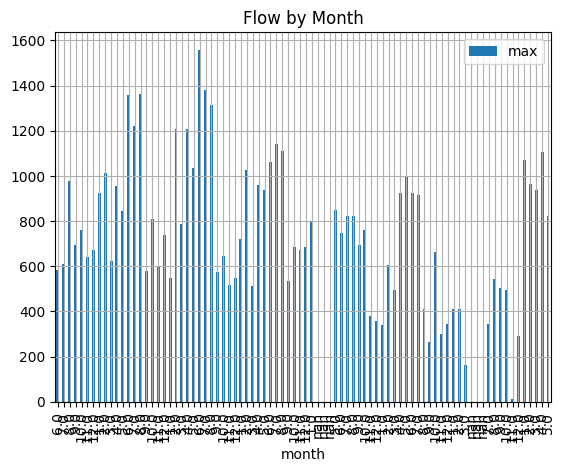

In [208]:
# 客流量按月
df = dataset.loc[:, ['max', 'month', 'year']]
# df
df = df.resample('M').mean()
df.plot(y='max', x='month', title='Flow by Month', kind='bar', grid=True)
# df.plot_bokeh()

<Axes: title={'center': 'Flow by Month'}, xlabel='dateInde'>

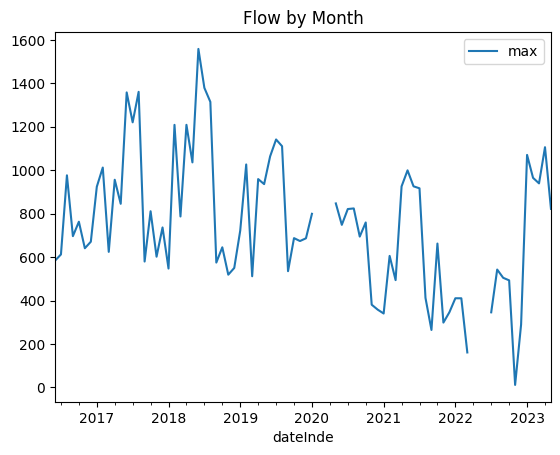

In [213]:
# 客流量按月
df = dataset.loc[:, ['value', 'max']]
df = df.resample('M').mean()
df.plot(y='max', title='Flow by Month')

In [ ]:
# ndata = dataset[dataset['week'] == 2]
# ndata = dataset.egg(['week'])
# ndata = dataset.egg(['week'])

dataset['2022-01-01', '2022-01-02']

KeyError: ('2022-01-01', '2022-01-02')

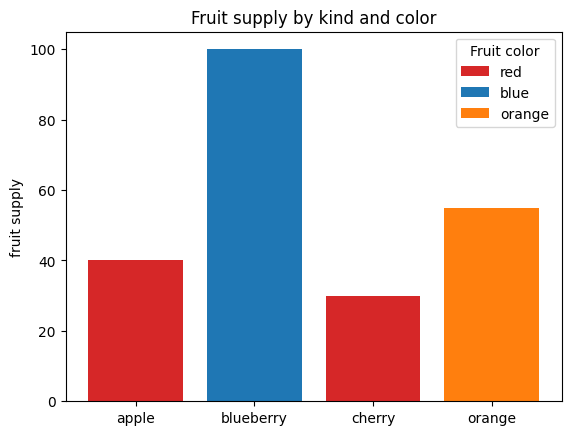

In [ ]:

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

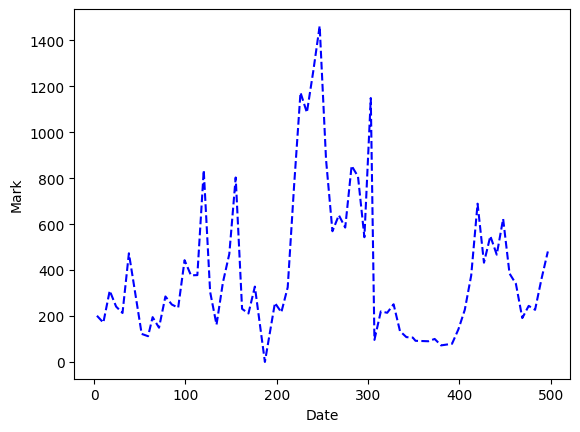

In [ ]:
data = []
for item in dailyData:
  if item.get('startTime') and item.get('startTime') != '09:00' and item.get('startTime') != '10:00':
    week = datetime.strptime(item['date'], "%Y-%m-%d").isoweekday()
    timex = time.mktime(time.strptime(item['date'], "%Y-%m-%d")) * 10000
    # month = datetime.strptime(item['date'], "%m")
    data.append({
      "timex": timex,
      "date": item['date'],
      "value": item['value'],
      "week": week
    })

dataset = pd.json_normalize(data)
from datetime import date as dt

dataset

# import matplotlib.pyplot as plt
# dataset = dataset[:17]
ndata = dataset[dataset['week'] == 2]

def cal_date(datet):
  year=int(datet/10000)
  months=int(datet%10000/100)
  days=datet%100
  print(year)
  # time=dt(year,months,days)
  # time=time.isoformat()
  # return time

# date=ndata['timex']
# date=date.values.tolist()
# date=[cal_date(x) for x in date]


plt.plot(ndata['value'],ls='--', c='b')
# plt.plot(ndata['date'], ndata['value'],ls='--', c='b')
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Mark")
plt.show()

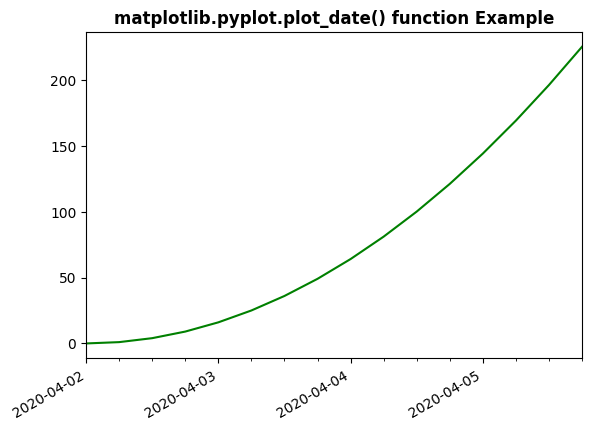

In [ ]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import numpy as np
   
date1 = datetime.datetime(2020, 4, 2)
date2 = datetime.datetime(2020, 4, 6)
delta = datetime.timedelta(hours = 6)
dates = drange(date1, date2, delta)
   
y = np.arange(len(dates))
   
fig, ax = plt.subplots()
ax.plot_date(dates, y ** 2, 'g')
   
ax.set_xlim(dates[0], dates[-1])
   
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(range(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
   
ax.fmt_xdata = DateFormatter('%Y-%m-%d % H:% M:% S')
fig.autofmt_xdate()
plt.title('matplotlib.pyplot.plot_date() function Example', fontweight ="bold")
plt.show()